# Coursework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import normalize
import seaborn as sns; sns.set()
import copy

## 4.1 Data 1 - Seperate 2 Gaussians

Setting two classes as 2D Gaussians

In [2]:
# Preparing the Gaussians
#--------------------------
np.random.seed(1)
ma = np.array([0,0]); mb = np.array([10,9]) #mean for a,b
Sa = [[6,-2],[-2,9]]; Sb = [[4,3],[3,4]]   #var for a,b
#Sa = [[4,3],[3,4]]; Sb = [[4,3],[3,4]]   #This line or the above should be commented
npts_a = 10000; npts_b = 10000
Xa = np.random.multivariate_normal(ma, Sa, npts_a)
Xb = np.random.multivariate_normal(mb, Sb, npts_b)

Set a eigenvalues: (5.00, 10.00)
Set a eigenvectors: (-0.89, -0.45), (-0.45, 0.89)
Set b eigenvalues: (1.00, 7.00)
Set b eigenvectors: (-0.71, 0.71), (0.71, 0.71)


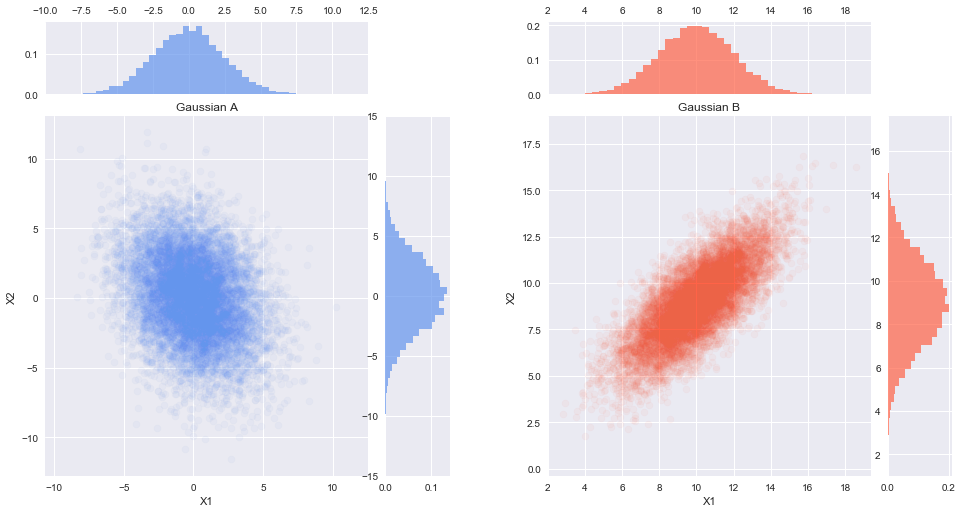

In [3]:
# VISUALISATION CELL
#-------------------------------------------------------------------------------
figA = plt.figure(1, figsize=(14,7))

gs = GridSpec(2,5, height_ratios=[0.2,1], width_ratios=[1,0.2,0.2,1,0.2])
gs.update(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1)

# Gaussian A
axA_10 = plt.subplot(gs[1,0])
axA_10.set_aspect(1,'datalim')
axA_10.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axA_10.set_xticks(axA_10.get_xlim(),10); axA_10.set_yticks(axA_10.get_ylim(),10)
axA_10.set_xlabel('X1'); axA_10.set_ylabel('X2'); axA_10.set_title('Gaussian A')

axA_11 = plt.subplot(gs[1,1])
axA_11.hist(Xa[:, 1], bins=40, density = True, alpha=0.7, orientation='horizontal', color='cornflowerblue')
axA_11.set_ylim(axA_10.get_ylim()); axA_11.set_yticks(axA_10.get_yticks())

axA_00 = plt.subplot(gs[0,0])
axA_00.hist(Xa[:, 0], bins=40, density = True, alpha=0.7, orientation='vertical', color='cornflowerblue')
axA_00.set_xlim(axA_10.get_xlim()); axA_00.set_xticks(axA_10.get_xticks()); axA_00.xaxis.tick_top()

# Gaussian B                   
axA_13 = plt.subplot(gs[1,3])
axA_13.set_aspect(1,'datalim')
axA_13.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05, c='tomato')
axA_13.set_xticks(axA_13.get_xlim(),10); axA_13.set_yticks(axA_13.get_ylim(),10)
axA_13.set_xlabel('X1'); axA_13.set_ylabel('X2'); axA_13.set_title('Gaussian B')

axA_14 = plt.subplot(gs[1,4])
axA_14.hist(Xb[:, 1], bins=40, density = True, alpha=0.7, orientation='horizontal', color='tomato')
axA_14.set_ylim(axA_13.get_ylim()); axA_14.set_yticks(axA_13.get_ylim(),10)

axA_03 = plt.subplot(gs[0,3])
axA_03.hist(Xb[:, 0], bins=40, density = True, alpha=0.7, orientation='vertical', color='tomato')
axA_03.set_xlim(axA_13.get_xlim()); axA_03.set_xticks(axA_13.get_xlim(),10); axA_03.xaxis.tick_top()
#-------------------------------------------------------------------------------
# Eigenvalues and Eigenvectors

eigenval_a, eigenvec_a = np.linalg.eigh(Sa)
eigenval_b, eigenvec_b = np.linalg.eigh(Sb)
print('Set a eigenvalues: (%.2f, %.2f)'%(eigenval_a[0],eigenval_a[1]))
print('Set a eigenvectors: (%.2f, %.2f), (%.2f, %.2f)'
      %(eigenvec_a[0,0],eigenvec_a[1,0],eigenvec_a[0,1],eigenvec_a[1,1]))
print('Set b eigenvalues: (%.2f, %.2f)'%(eigenval_b[0],eigenval_b[1]))
print('Set b eigenvectors: (%.2f, %.2f), (%.2f, %.2f)'
      %(eigenvec_b[0,0],eigenvec_b[1,0],eigenvec_b[0,1],eigenvec_b[1,1]))


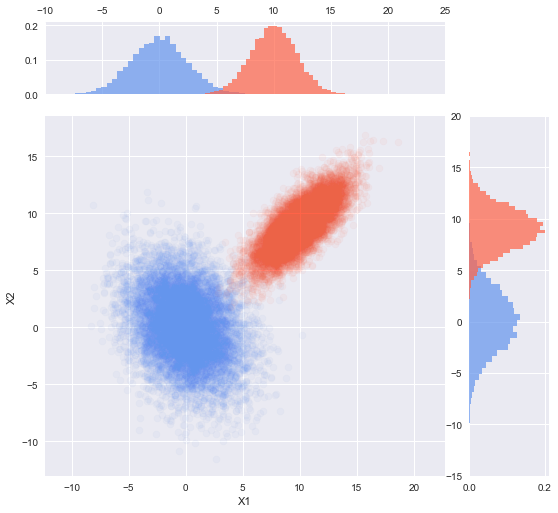

In [4]:
# VISUALISATION CELL
#-------------------------------------------------------------------------------
# Gaussian A,B
figB = plt.figure(2, figsize=(7,7))
gs = GridSpec(2,2, height_ratios=[0.2,1], width_ratios=[1,0.2])
gs.update(left=0, right=1, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1)

axB_10 = plt.subplot(gs[1,0])
axB_10.set_aspect(1,'datalim')
axB_10.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axB_10.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axB_10.set_xticks(axB_10.get_xlim(),10); axB_10.set_yticks(axB_10.get_ylim(),10)
axB_10.set_xlabel('X1'); axB_10.set_ylabel('X2')

axB_11 = plt.subplot(gs[1,1])
axB_11.hist(Xa[:, 1], bins=40, density = True, alpha=0.7, orientation='horizontal', color='cornflowerblue')
axB_11.hist(Xb[:, 1], bins=40, density = True, alpha=0.7, orientation='horizontal', color='tomato')
axB_11.set_ylim(axB_10.get_ylim()); axB_11.set_yticks(axB_10.get_yticks())

axB_00 = plt.subplot(gs[0,0])
axB_00.hist(Xa[:, 0], bins=40, density = True, alpha=0.7, orientation='vertical', color='cornflowerblue')
axB_00.hist(Xb[:, 0], bins=40, density = True, alpha=0.7, orientation='vertical', color='tomato')
axB_00.set_xlim(axB_10.get_xlim()); axB_00.set_xticks(axB_10.get_xticks()); axB_00.xaxis.tick_top()

### 1a) Making 4 illustrative choices for W
In this block I defined some random lines (with biased intercept just for visual convenience). A function finds the unit vector $w$ for each one and in order to get the projected points $y^n=W^TX$ in the desired direction.
The projection in one dimension is a vector $P_{1D}=x_p+f(x_p)$ where $f(x)= w_1(x) + w_0$ .

In [5]:
def projected(points,intercept,slope):
    # Find the unit vector of the line
    # for x =1 -> y= f(x)
    x = 1; y = slope*x
    w_unit = np.reshape(np.hstack([x, y]),(1,2))/np.sqrt(x**2 + y**2) # Unit vector of line
    P = np.reshape(points,(len(points[:,0]),2)) # Vector of data point
    
    proj = np.dot(P,w_unit.T)*w_unit
    proj += [-slope*intercept/(slope**2 + 1), intercept/(slope**2 + 1)] # This line move the proj from (0,0)line 
    return proj,w_unit.T                                                # to the original line with the defined
                                                                        # intercept.
def eq(x,intercept,slope):
    return slope*x + intercept # the line equation

# Line initialization & Point projecting
#------------------------------------------
line = np.array([[15, 0],[15, 7],[15, -2],[2.5, 1]]) #[intercept, slope], the 4 initial w are adjustable
line.reshape((2,4))

Proj_a = np.empty([npts_a, 2, len(line)])
Proj_b = np.empty([npts_b, 2, len(line)])
x_axis = []; y_axis = []
w = np.empty([2,1])

i = 0
for intr,sl in line:
    Proj_a[:,:,i],_ = projected(Xa,intr,sl) 
    Proj_b[:,:,i],_ = projected(Xb,intr,sl)
 
    x_min = np.min([np.min(Proj_a[:,0,i]),np.min(Proj_b[:,0,i])])-0.2 #setting the line for every W
    x_max = np.max([np.max(Proj_a[:,0,i]),np.max(Proj_b[:,0,i])])+0.2
    x_axis.append(np.linspace(x_min,x_max,2))
    y_axis.append(eq(x_axis[i],intr,sl))
    i += 1
    
# Interpreting projections in 1D for the first line.
# The rest (3) lines are just for illustrating purposes.
# The line projection is just for visual reasons.
#-------------------------------------------------------------------------------
Proj_a_1D = np.reshape(Proj_a[:,0,0] + Proj_a[:,1,0],(npts_a,1))
Proj_b_1D = np.reshape(Proj_b[:,0,0] + Proj_b[:,1,0],(npts_b,1))

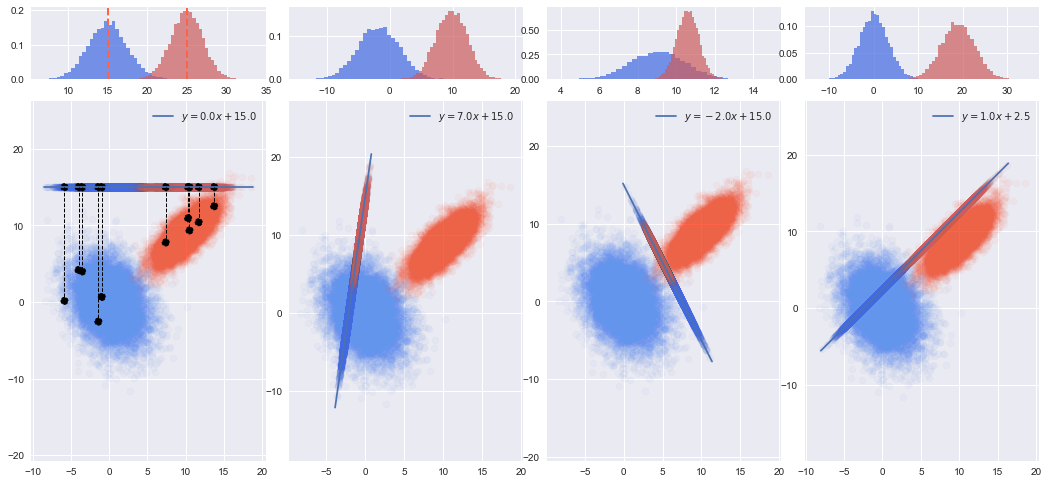

In [6]:
# VISUALISATION CELL
#-------------------------------------------------------------------------------
figC = plt.figure(3, figsize=(14,7));
gs = GridSpec(2,len(line), height_ratios=[0.2,1], width_ratios=len(line)*[1]);
gs.update(left=0, right=1, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1);
# For line No.1 -------------------------------------------------------------------------------
axC_00 = plt.subplot(gs[0,0]);                                               # HISTOGRAMS
axC_00.hist(Proj_a[:,0,0] + Proj_a[:,1,0], bins=40, density = True, alpha=0.7, color = 'royalblue')
axC_00.hist(Proj_b[:,0,0] + Proj_b[:,1,0], bins=40, density = True, alpha=0.7, color = 'indianred')

axC_10 = plt.subplot(gs[1,0]) ;                                              # SCATTERING
axC_10.set_aspect(1,'datalim');
axC_10.plot(x_axis[0],y_axis[0],label='$y = %sx + %s$' % (line[0][1],line[0][0]))
axC_10.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axC_10.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axC_10.scatter(Proj_a[:,0,0], Proj_a[:,1,0], alpha = 0.05,c='royalblue')
axC_10.scatter(Proj_b[:,0,0], Proj_b[:,1,0], alpha = 0.05,c='indianred')
axC_10.legend()
# For line No.2 -------------------------------------------------------------------------------
axC_01 = plt.subplot(gs[0,1]);                                               # HISTOGRAMS
axC_01.hist(Proj_a[:,0,1] + Proj_a[:,1,1], bins=40, density = True, alpha=0.7, color = 'royalblue')
axC_01.hist(Proj_b[:,0,1] + Proj_b[:,1,1], bins=40, density = True, alpha=0.7, color = 'indianred')

axC_11 = plt.subplot(gs[1,1]);                                               # SCATTERING
axC_11.set_aspect(1,'datalim');
axC_11.plot(x_axis[1],y_axis[1],label='$y = %sx + %s$' % (line[1][1],line[1][0]))
axC_11.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axC_11.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axC_11.scatter(Proj_a[:,0,1], Proj_a[:,1,1], alpha = 0.05,c='royalblue')
axC_11.scatter(Proj_b[:,0,1], Proj_b[:,1,1], alpha = 0.05,c='indianred')
axC_11.legend()
# For line No.3 -------------------------------------------------------------------------------
axC_02 = plt.subplot(gs[0,2]);                                               # HISTOGRAMS
axC_02.hist(Proj_a[:,0,2] + Proj_a[:,1,2], bins=40, density = True, alpha=0.7, color = 'royalblue')
axC_02.hist(Proj_b[:,0,2] + Proj_b[:,1,2], bins=40, density = True, alpha=0.7, color = 'indianred')

axC_12 = plt.subplot(gs[1,2]);                                               # SCATTERING
axC_12.set_aspect(1,'datalim');
axC_12.plot(x_axis[2],y_axis[2],label='$y = %sx + %s$' % (line[2][1],line[2][0]))
axC_12.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axC_12.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axC_12.scatter(Proj_a[:,0,2], Proj_a[:,1,2], alpha = 0.05,c='royalblue')
axC_12.scatter(Proj_b[:,0,2], Proj_b[:,1,2], alpha = 0.05,c='indianred')
axC_12.legend()
# For line No.4 -------------------------------------------------------------------------------
axC_03 = plt.subplot(gs[0,3]);                                               # HISTOGRAMS
axC_03.hist(Proj_a[:,0,3] + Proj_a[:,1,3], bins=40, density = True, alpha=0.7, color = 'royalblue')
axC_03.hist(Proj_b[:,0,3] + Proj_b[:,1,3], bins=40, density = True, alpha=0.7, color = 'indianred')

axC_13 = plt.subplot(gs[1,3]);                                               # SCATTERING
axC_13.set_aspect(1,'datalim');
axC_13.plot(x_axis[3],y_axis[3],label='$y = %sx + %s$' % (line[3][1],line[3][0]))
axC_13.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axC_13.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axC_13.scatter(Proj_a[:,0,3], Proj_a[:,1,3], alpha = 0.05,c='royalblue')
axC_13.scatter(Proj_b[:,0,3], Proj_b[:,1,3], alpha = 0.05,c='indianred')
axC_13.legend()
# Making the line No.1 graph prettier
#--------------------------------------------------------------------------------------
axC_00.axvline(np.mean(Proj_a_1D), color='tomato', linestyle='dashed', linewidth=2)
axC_00.axvline(np.mean(Proj_b_1D), color='tomato', linestyle='dashed', linewidth=2)
axC_10.plot([Proj_a[0:5,0,0], Xa[0:5,0]],[Proj_a[0:5,1,0], Xa[0:5,1]],
            linestyle='dashed',linewidth=1, color = 'k')
axC_10.plot([Proj_b[0:5,0,0], Xb[0:5,0]],[Proj_b[0:5,1,0], Xb[0:5,1]],
            linestyle='dashed',linewidth=1, color = 'k')
axC_10.scatter([Proj_a[0:5,0,0], Xa[0:5,0]],[Proj_a[0:5,1,0], Xa[0:5,1]],
               linestyle='dashed',linewidth=1, color = 'k')
axC_10.scatter([Proj_b[0:5,0,0], Xb[0:5,0]],[Proj_b[0:5,1,0], Xb[0:5,1]],
               linestyle='dashed',linewidth=1, color = 'k')


### 1b) Find the best fit of line to get max $F(w)$

We use the first line as $w_{init}$ and we will find the best fit.

In [7]:
# Getting the unit vector w of the first line
_, w0 = projected(Xa,line[0,0],line[0,1])
print('w_init unitary: (%.2f, %.2f)' %(w0[0,0],w0[1,0]))

w_init unitary: (1.00, 0.00)


Computing the Fisher score: $F(w)=\frac{W^TS_BW}{W^TS_WW}(n_a+n_b)$

In [8]:
# Calculating Fisher terms
#----------------------------
def s_b(m_plus, m_minus):
    m_plus = np.reshape(m_plus,(2,1))
    m_minus = np.reshape(m_minus,(2,1))
    return np.dot((m_plus - m_minus),(m_plus-m_minus).T)
def s_c(x,n):
    u = x.mean(axis=0)
    return np.dot((x-u).T, (x-u).conj())/(n-1)
def fisher_score(w,sb,sw):
    return w.T.dot(sb.dot(w))/(w.T.dot(sw.dot(w)))

SB = s_b(ma,mb)
SW = npts_a*s_c(Xa,npts_a) + npts_b*s_c(Xb,npts_b)
score0 = (npts_a+npts_b)*fisher_score(w0,SB,SW)
print('Fisher score for w_init: %.2f' %(score0))

Fisher score for w_init: 19.86


-  Searching for every $θ$ to get $argmaxF(w(θ))$

In [9]:
# Rotating w in 360degrees
def rotation(th,w):
    r = np.reshape([np.cos(th), -np.sin(th), np.sin(th), np.cos(th)],(2,2))
    return r.dot(w)

rads = np.linspace(0,np.pi*2,359)
score = [];
for theta in rads:
    w_th = rotation(theta,w0)
    score.append(fisher_score(w_th,SB,SW))

# Sorting from max score to min    
score_theta = np.concatenate((np.reshape(score,(359,1)),np.reshape(rads,(359,1))),axis=1)
maximum_score = max(score_theta,key=lambda l:l[0])
w_max = rotation(maximum_score[1],w0)
slope_max = w_max[1]/w_max[0]

Solving with theta search - argmax(F(w)): (0.83, 0.56)
Max F(w): 0.00
Angle θ: 0.60  rads or 34.19  degrees.


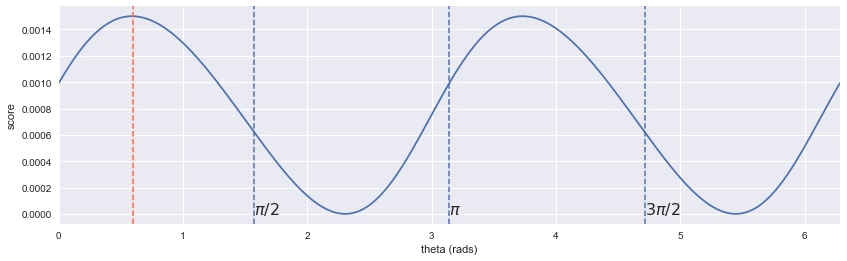

In [10]:
# Updating the projections
#--------------------------
Proj_a_max = np.dot(np.reshape(Xa,(len(Xa[:,0]),2)),w_max)*w_max.T
Proj_b_max = np.dot(np.reshape(Xb,(len(Xb[:,0]),2)),w_max)*w_max.T
Proj_a_max += np.reshape([-slope_max*line[0,0]/(slope_max**2 + 1), 
                          line[0,0]/(slope_max**2 + 1)],(1,2))
Proj_b_max += np.reshape([-slope_max*line[0,0]/(slope_max**2 + 1), 
                          line[0,0]/(slope_max**2 + 1)],(1,2))

x_min = np.min([np.min(Proj_a_max[:,0]),np.min(Proj_b_max[:,0])])-0.2 # setting a new line for visualization
x_max = np.max([np.max(Proj_a_max[:,0]),np.max(Proj_b_max[:,0])])+0.2
x_axis_max = np.linspace(x_min,x_max,2); y_axis_max = eq(x_axis_max,line[0,0],slope_max)

# F(w(theta))  Visualization
#----------------------------
figD, axD = plt.subplots(figsize = (14,4))
axD.plot(rads,np.reshape(score,(359,1)))
axD.set_xlabel('theta (rads)'); axD.set_ylabel('score')
axD.set_xlim([0,np.pi*2])
axD.axvline(np.pi/2, linestyle='dashed', linewidth=1.5)
axD.axvline(np.pi, linestyle='dashed', linewidth=1.5)
axD.axvline(np.pi*3/2, linestyle='dashed', linewidth=1.5)
axD.axvline(maximum_score[1], color='tomato', linestyle='dashed', linewidth=1.5)
axD.text(np.pi/2,0,'$π/2$',fontsize=16); axD.text(np.pi,0,'$π$',fontsize=16);
axD.text(3*np.pi/2,0,'$3π/2$',fontsize=16)

print('Solving with theta search - argmax(F(w)): (%.2f, %.2f)'%(w_max[0,0],w_max[1,0]))
print('Max F(w): %.2f'%(maximum_score[0]))
print('Angle θ: %.2f'%(maximum_score[1]),' rads or %.2f'%(maximum_score[1]*180/np.pi),' degrees.')


-  Solving the  eigenvalue problem considering $S_W$ is invertible:<br>
$S_Bw = λS_Ww$ ,where $λ=\frac{W^TS_BW}{W^TS_WW}$ fisher ratio (or Rayleigh quotient)    or $λ=\frac{F(w)}{(n_a+n_b)}$

In [11]:
# Solving the generalised eigenvalue equation
eigenvals_wmax, eigenvecs_wmax = sp.linalg.eigh(SB,SW,type=1)
score_eig = eigenvals_wmax[1]*(npts_a+npts_b)
norm_eigenvecs = normalize(eigenvecs_wmax[:,1][:,np.newaxis], axis=0).ravel()
print('Solving with eigenvectors - argmax(F(w)): (%.2f, %.2f)'%(norm_eigenvecs[0],norm_eigenvecs[1]))
print('Max F(w): %.2f'%(score_eig))

Solving with eigenvectors - argmax(F(w)): (-0.83, -0.56)
Max F(w): 30.02


In [12]:
# Updating the projections
#--------------------------
slope_eig = norm_eigenvecs[1]/norm_eigenvecs[0]

Proj_a_eig = np.dot(np.reshape(Xa,(len(Xa[:,0]),2)),np.reshape(norm_eigenvecs,(2,1)))*np.reshape(norm_eigenvecs,(2,1)).T
Proj_b_eig = np.dot(np.reshape(Xb,(len(Xb[:,0]),2)),np.reshape(norm_eigenvecs,(2,1)))*np.reshape(norm_eigenvecs,(2,1)).T
Proj_a_eig += np.reshape([-slope_eig*line[0,0]/(slope_eig**2 + 1), 
                       line[0,0]/(slope_eig**2 + 1)],(1,2))
Proj_b_eig += np.reshape([-slope_eig*line[0,0]/(slope_eig**2 + 1), 
                          line[0,0]/(slope_eig**2 + 1)],(1,2))

x_min_eig = np.min([np.min(Proj_a_eig[:,0]),np.min(Proj_b_eig[:,0])])-0.2 # setting a new line for visualization
x_max_eig = np.max([np.max(Proj_a_eig[:,0]),np.max(Proj_b_eig[:,0])])+0.2
x_axis_eig = np.linspace(x_min_eig,x_max_eig,2)
y_axis_eig = eq(x_axis_eig,line[0,0],slope_eig)

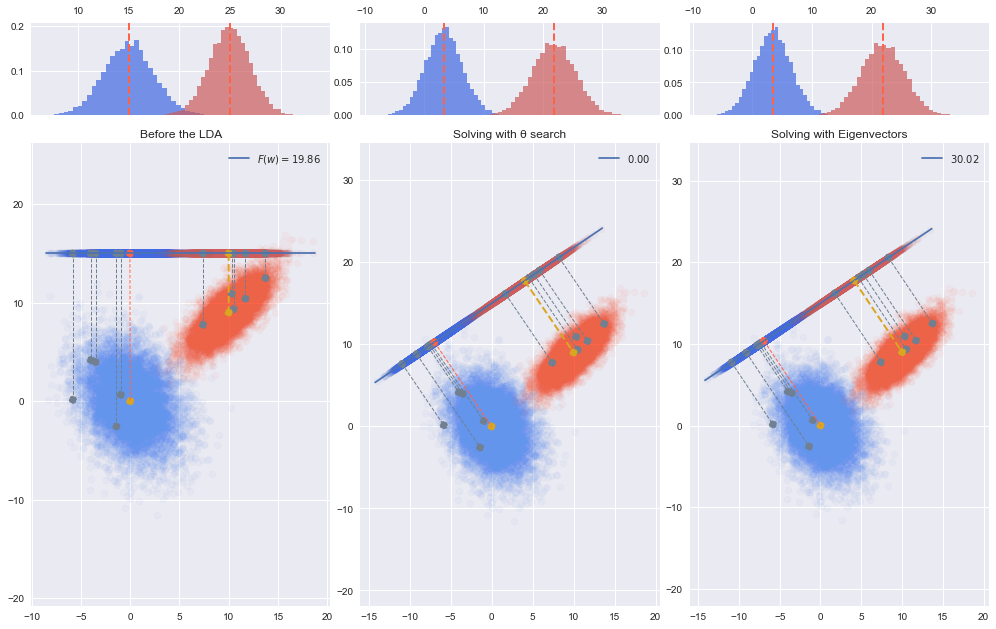

In [13]:
# VISUALIZATION CELL
#--------------------------------------------------------------------------------
figE = plt.figure(figsize=(14,9));
gs = GridSpec(2,3, height_ratios=[0.2,1], width_ratios=[1,1,1]);
gs.update(left=0.05, right=1, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1);

# BEFORE THE LDA
axE_00 = plt.subplot(gs[0,0]); axE_00.xaxis.tick_top()                      # HISTOGRAMS
axE_00.hist(sum(Proj_a_1D.T), bins=40, density = True, alpha=0.7, color = 'royalblue')
axE_00.hist(sum(Proj_b_1D.T), bins=40, density = True, alpha=0.7, color = 'indianred')
axE_10 = plt.subplot(gs[1,0])                                               # SCATTERING
axE_10.set_aspect(1,'datalim'); axE_10.set_title('Before the LDA')
axE_10.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axE_10.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axE_10.scatter(Proj_a[:,0,0], Proj_a[:,1,0], alpha = 0.05,c='royalblue')
axE_10.scatter(Proj_b[:,0,0], Proj_b[:,1,0], alpha = 0.05,c='indianred')
axE_10.plot(x_axis[0],y_axis[0],label='$F(w) = %.2f$' %score0);
axE_10.legend()

# LDA THETA SOLUTION
axE_01 = plt.subplot(gs[0,1]); axE_01.xaxis.tick_top()                      # HISTOGRAMS
axE_01.hist(sum(Proj_a_max.T), bins=40, density = True, alpha = 0.7, color='royalblue')
axE_01.hist(sum(Proj_b_max.T), bins=40, density = True, alpha = 0.7, color='indianred')
axE_11 = plt.subplot(gs[1,1])                                               # SCATTERING
axE_11.set_aspect(1,'datalim'); axE_11.set_title('Solving with θ search')
axE_11.scatter(Xa[:,0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axE_11.scatter(Xb[:,0], Xb[:, 1], alpha = 0.05,c='tomato')
axE_11.scatter(Proj_a_max[:,0], Proj_a_max[:, 1], alpha = 0.05,c='royalblue')
axE_11.scatter(Proj_b_max[:,0], Proj_b_max[:, 1], alpha = 0.05,c='indianred')
axE_11.plot(x_axis_max,y_axis_max,label='$%.2f$' %maximum_score[0]);
axE_11.legend()

# LDA EIGENVALUE SOLUTION
axE_02 = plt.subplot(gs[0,2]); axE_02.xaxis.tick_top()                      # HISTOGRAMS
axE_02.hist(sum(Proj_a_eig.T), bins=40, density = True, alpha=0.7, color = 'royalblue')
axE_02.hist(sum(Proj_b_eig.T), bins=40, density = True, alpha=0.7, color = 'indianred')
axE_12 = plt.subplot(gs[1,2])                                               # SCATTERING
axE_12.set_aspect(1,'datalim')
axE_12.plot(x_axis_eig,y_axis_eig,label='$%.2f$' %score_eig); 
axE_12.set_title('Solving with Eigenvectors')
axE_12.scatter(Xa[:, 0], Xa[:, 1], alpha = 0.05,c='cornflowerblue')
axE_12.scatter(Xb[:, 0], Xb[:, 1], alpha = 0.05,c='tomato')
axE_12.scatter(Proj_a_eig[:,0], Proj_a_eig[:,1], alpha = 0.05,c='royalblue')
axE_12.scatter(Proj_b_eig[:,0], Proj_b_eig[:,1], alpha = 0.05,c='indianred')
axE_12.legend()

# Adding pretty details

axE_00.axvline(sum(Proj_a_1D)/npts_a, color='tomato', linestyle='dashed', linewidth=2)
axE_00.axvline(sum(Proj_b_1D)/npts_b, color='tomato', linestyle='dashed', linewidth=2)
axE_10.plot([Proj_a[0:5,0,0], Xa[0:5,0]],[Proj_a[0:5,1,0], Xa[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_10.plot([Proj_b[0:5,0,0], Xb[0:5,0]],[Proj_b[0:5,1,0], Xb[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_10.scatter([Proj_a[0:5,0,0], Xa[0:5,0]],[Proj_a[0:5,1,0], Xa[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_10.scatter([Proj_b[0:5,0,0], Xb[0:5,0]],[Proj_b[0:5,1,0], Xb[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_10.scatter(sum(Proj_a[:,0,0])/npts_a, sum(Proj_a[:,1,0])/npts_a, linestyle='dashed',linewidth=1, color = 'tomato')
axE_10.scatter(ma[0], ma[1], linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_10.plot([sum(Proj_a[:,0,0])/npts_a, ma[0]],[sum(Proj_a[:,1,0])/npts_a, ma[1]], linestyle='dashed',linewidth=1, color = 'tomato')
axE_10.scatter(sum(Proj_b[:,0,0])/npts_b, sum(Proj_b[:,1,0])/npts_b, linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_10.scatter(mb[0], mb[1], linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_10.plot([sum(Proj_b[:,0,0])/npts_b, mb[0]],[sum(Proj_b[:,1,0])/npts_b, mb[1]], linestyle='dashed',linewidth=2, color = 'goldenrod')

axE_01.axvline(sum(sum(Proj_a_max.T))/npts_a, color='tomato', linestyle='dashed', linewidth=2)
axE_01.axvline(sum(sum(Proj_b_max.T))/npts_b, color='tomato', linestyle='dashed', linewidth=2)
axE_11.plot([Proj_a_max[0:5,0], Xa[0:5,0]],[Proj_a_max[0:5,1], Xa[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_11.plot([Proj_b_max[0:5,0], Xb[0:5,0]],[Proj_b_max[0:5,1], Xb[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_11.scatter([Proj_a_max[0:5,0], Xa[0:5,0]],[Proj_a_max[0:5,1], Xa[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_11.scatter([Proj_b_max[0:5,0], Xb[0:5,0]],[Proj_b_max[0:5,1], Xb[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_11.scatter(sum(Proj_a_max[:,0])/npts_a, sum(Proj_a_max[:,1])/npts_a, linestyle='dashed',linewidth=1, color = 'tomato')
axE_11.scatter(ma[0], ma[1], linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_11.plot([sum(Proj_a_max[:,0])/npts_a, ma[0]],[sum(Proj_a_max[:,1])/npts_a, ma[1]], linestyle='dashed',linewidth=1, color = 'tomato')
axE_11.scatter(sum(Proj_b_max[:,0])/npts_b, sum(Proj_b_max[:,1])/npts_b, linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_11.scatter(mb[0], mb[1], linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_11.plot([sum(Proj_b_max[:,0])/npts_b, mb[0]],[sum(Proj_b_max[:,1])/npts_b, mb[1]], linestyle='dashed',linewidth=2, color = 'goldenrod')

axE_02.axvline(sum(sum(Proj_a_eig))/npts_a, color='tomato', linestyle='dashed', linewidth=2)
axE_02.axvline(sum(sum(Proj_b_eig))/npts_b, color='tomato', linestyle='dashed', linewidth=2)
axE_12.plot([Proj_a_eig[0:5,0], Xa[0:5,0]],[Proj_a_eig[0:5,1], Xa[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_12.plot([Proj_b_eig[0:5,0], Xb[0:5,0]],[Proj_b_eig[0:5,1], Xb[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_12.scatter([Proj_a_eig[0:5,0], Xa[0:5,0]],[Proj_a_eig[0:5,1], Xa[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_12.scatter([Proj_b_eig[0:5,0], Xb[0:5,0]],[Proj_b_eig[0:5,1], Xb[0:5,1]], linestyle='dashed',linewidth=1, color = 'slategrey')
axE_12.scatter(sum(Proj_a_eig[:,0])/npts_a, sum(Proj_a_eig[:,1])/npts_a, linestyle='dashed',linewidth=1, color = 'tomato')
axE_12.scatter(ma[0], ma[1], linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_12.plot([sum(Proj_a_eig[:,0])/npts_a, ma[0]],[sum(Proj_a_eig[:,1])/npts_a, ma[1]], linestyle='dashed',linewidth=1, color = 'tomato')
axE_12.scatter(sum(Proj_b_eig[:,0])/npts_b, sum(Proj_b_eig[:,1])/npts_b, linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_12.scatter(mb[0], mb[1], linestyle='dashed',linewidth=1, color = 'goldenrod')
axE_12.plot([sum(Proj_b_eig[:,0])/npts_b, mb[0]],[sum(Proj_b_eig[:,1])/npts_b, mb[1]], linestyle='dashed',linewidth=2, color = 'goldenrod')



### 2a + 2b) Drawing equi-probable contour lines ,Plotting decision boundary
Changing $Σ_a,Σ_b$ (in the first cell), you can see the linear form when $Σ_a=Σ_b$ or the quadratic when $Σ_a\neqΣ_b$ <br><br>
$logodds = g_a(x)-g_b(x) = ln\frac{P(C=a)}{P(C=b)}+(μ_a-μ_b)^ΤΣx +$ independent term <br><br>
 $g_c = lnP(C_c) + \frac{1}{2}ln|Λ_c| -\frac{1}{2}(x^TΛ_cx-2{μ_c}^TΛ_cx+μ^TΛ_cμ)$, $P(C=c) = \frac{n_c}{N}$

<a list of 1 text.Text objects>

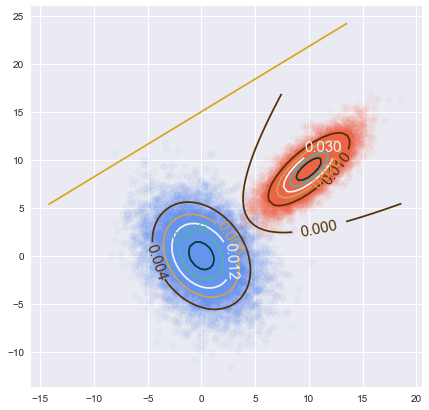

In [14]:
xx = np.linspace(np.min([np.min(Xa[:,0]), np.min(Xb[:,0])]),np.max([np.max(Xa[:,0]), np.max(Xb[:,0])]),60);
yy = np.linspace(np.min([np.min(Xa[:,1]), np.min(Xb[:,1])]),np.max([np.max(Xa[:,1]), np.max(Xb[:,1])]),60);
xx, yy = np.meshgrid(xx, yy)
grid = np.empty(xx.shape + (2,))
grid[:, :, 0] = xx; grid[:, :, 1] = yy
# Gaussian A --------------------------------
var = sp.stats.multivariate_normal(mean=ma, cov=Sa)
zz_a = var.pdf(grid) # Giving in every pair x1,x2 probability

# Gaussian B --------------------------------
var = sp.stats.multivariate_normal(mean=mb, cov=Sb)
zz_b = var.pdf(grid)

# Contour lines -----------------------------
figF,axF = plt.subplots(figsize=(7,7))

contour_Xa = axF.contour(xx,yy,zz_a,5,cmap='BrBG')
plt.clabel(contour_Xa, inline=True, fontsize=15)
axF.scatter(Xa[:,0],Xa[:,1], alpha=0.05, color='cornflowerblue')

contour_Xb = axF.contour(xx,yy,zz_b,5, cmap='BrBG')
plt.clabel(contour_Xb, inline=True, fontsize=15)
axF.scatter(Xb[:,0],Xb[:,1], alpha=0.05, color='tomato')

axF.plot(x_axis_max,y_axis_max, color='goldenrod')

def decision_b(nplus,nminus,m,s,x):
    s = np.linalg.pinv(s)
    p_c = nplus/(nplus + nminus);
    g = np.log(p_c*np.sqrt(np.linalg.det(s))) -0.5*(np.dot(x.T,np.dot(s,x)) 
                                           - 2*np.dot(m.T,np.dot(s,x)) + np.dot(m.T,np.dot(s,m)))
    return g
sns.set()
log_odds = np.empty([60,60])
for i in range(60):
    for j in range(60):
        log_odds[i,j] = decision_b(npts_a,npts_b,ma,Sa,grid[i,j,:]) - decision_b(npts_b,npts_a,mb,Sb,grid[i,j,:])
contour_dec = axF.contour(xx,yy,log_odds,0,cmap='BrBG')

plt.clabel(contour_dec, inline=True, fontsize=15)


### 2c) Fisher unbalanced score
Because Fisher ratio in the handout gets unscaled, I correct it by multiplying by 2, so  $F_{unb}(w)=2\frac{{m_a+-m_b}^2}{({σ^2}_a+{σ^2}_b)}$

In [15]:
# Fisher unbalanced Scattering within classes
#----------------------------------------------
SW_unbalanced = (s_c(Xa,npts_a) + s_c(Xb,npts_b))
# Solving the eigenvalue equation
vals_unb, vecs_unb = sp.linalg.eigh(SB,SW_unbalanced,type=1)
norm_vecs_unb = normalize(vecs_unb[:,1][:,np.newaxis], axis=0).ravel()
score_unbalanced = 2*fisher_score(norm_vecs_unb,SB,SW_unbalanced)
print('Eigenvectors of unbalanced eq: (%.2f, %.2f)' %(norm_eigenvecs[0],norm_eigenvecs[1]))
print('Unbalanced  F(w): %.2f' %(score_unbalanced))
print('Balanced F(w): %.2f' %(score_eig))

Eigenvectors of unbalanced eq: (-0.83, -0.56)
Unbalanced  F(w): 30.02
Balanced F(w): 30.02


## Data 2 - Iris data

In [16]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
features = iris.feature_names
classes = iris.target_names

npts_iris = np.empty([1,len(classes)])
means = np.empty([len(classes),len(features)])
for i in range(len(classes)):
    npts_iris[:,i] = (Y==i).sum()
    means[i] = np.mean(X[Y==i],axis=0)

In [17]:
np.random.seed(1)
n, p = X.shape

# LDA for multiple classes
#-------------------------
def sb_multiple(m,n):
    overall_mean =np.mean(m,axis=1)
    mean_betweens = np.zeros([len(m[:,0]),len(m[:,0])])
    
    for i,Ni in enumerate(n):
        mi_m = (m[:,i]-overall_mean).reshape(len(m[:,0]),1)
        mean_betweens += Ni*(mi_m).dot(mi_m.T)
    return mean_betweens

def sc_multiple(x, m):
    return (x - m).T.dot(x - m)

def score_multiple(w,sb,sw):
    return w.T.dot(sb.dot(w))/(w.T.dot(sw.dot(w)))

SB_iris = sb_multiple(means.T,npts_iris.T)/np.sum(npts_iris)
SW_iris = np.zeros([len(features),len(features)])
for i,m in enumerate(means):
    SW_iris += sc_multiple(X[Y==i],m)

### 1) Finding the optimal direction of $w$

In [18]:
#Check the eigenvalues of SB for intuitive purposes:
#---------------------------------------------------
print(sp.linalg.eigvals(SB_iris).real)

[3.90963989e+00 3.32774399e-02 6.58311679e-17 6.58311679e-17]


**Solving the generalised eigenvalue problem, keeping the non zero eigenvalues' eigenvectors for the projection space**

In [19]:
# Solving the eigenvalues problem.
#----------------------------------------------
vals, vecs = sp.linalg.eigh(SB_iris,SW_iris,type=1) #This specifies Aw=lBw
for i in range(len(vecs)):
    vecs[:,i] = normalize(vecs[:,i][:,np.newaxis], axis=0).ravel()
idx = vals.argsort()[::-1]   
vals = vals[idx]
vecs = vecs[:,idx]
w = np.stack((vecs[:,0],vecs[:,1]),axis=1)
print('Eigenvalues: \n',vals)
print('Eigenvvectors: \n',vecs,'\n')
print('Vectors we need to project our data: %i' %(w.shape[1]))
print('Dimensions of each vector: %i' %(w.shape[0]))

Eigenvalues: 
 [2.15146385e-01 1.85044576e-03 5.28340676e-17 3.10973263e-17]
Eigenvvectors: 
 [[ 0.20490976  0.00898234 -0.83459752 -0.19313868]
 [ 0.38714331  0.58899857  0.38854016  0.39321907]
 [-0.54648218 -0.25428655  0.38720727  0.45531836]
 [-0.71378517  0.76703217 -0.05053772 -0.775088  ]] 

Vectors we need to project our data: 2
Dimensions of each vector: 4


In [20]:
# Checking Solution
# (SB - λSW)w = 0w
#------------------
print('Check if SbW=λSwW:')
print(np.isclose(SB_iris.dot(vecs)-vals*SW_iris.dot(vecs),0))

Check if SbW=λSwW:
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


### 2) Displaying the histograms of the projected data

In [21]:
X_reduced = X.dot(w) # Project data

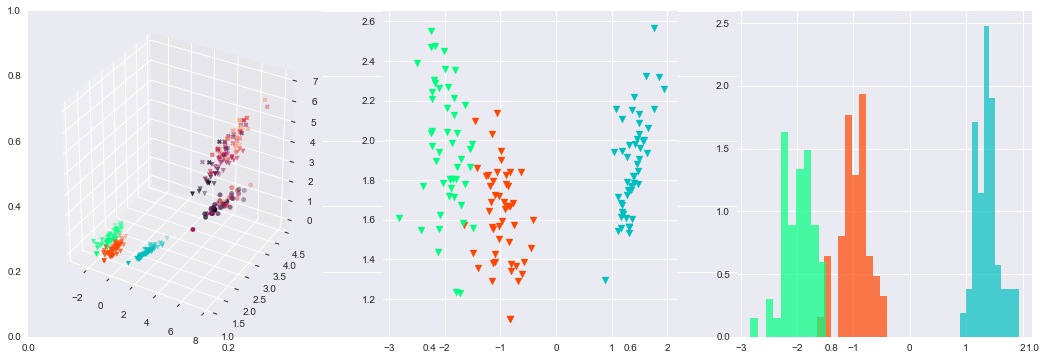

In [22]:
# VISUALIZATION CELL
#-----------------------------------------------------------------------------
figG, axG = plt.subplots(figsize=(18,6))

axG = figG.add_subplot(131, projection='3d');
axG.scatter(X[Y == 0,0],X[Y == 0,1],X[Y == 0,2],c = X[Y==0,3], marker ='o')
axG.scatter(X[Y == 1,0],X[Y == 1,1],X[Y == 1,2],c = X[Y==1,3], marker = 'v')
axG.scatter(X[Y == 2,0],X[Y == 2,1],X[Y == 2,2],c = X[Y==2,3], marker = 'X')

axG.scatter(X_reduced[Y==0,0],X_reduced[Y == 0,1],c = 'c', marker ='v')
axG.scatter(X_reduced[Y==1,0],X_reduced[Y == 1,1],c = 'orangered', marker ='v')
axG.scatter(X_reduced[Y==2,0],X_reduced[Y == 2,1],c = 'springgreen', marker ='v')

axG = figG.add_subplot(132);
axG.scatter(X_reduced[Y==0,0],X_reduced[Y == 0,1],c = 'c', marker ='v')
axG.scatter(X_reduced[Y==1,0],X_reduced[Y == 1,1],c = 'orangered', marker ='v')
axG.scatter(X_reduced[Y==2,0],X_reduced[Y == 2,1],c = 'springgreen', marker ='v')

axG = figG.add_subplot(133);
axG.hist(X_reduced[Y==0,0],bins=10, alpha=0.7, density=True, color = 'c');
axG.hist(X_reduced[Y==1,0],bins=10, alpha=0.7, density=True, color = 'orangered');
axG.hist(X_reduced[Y==2,0],bins=10, alpha=0.7, density=True, color = 'springgreen');

### 3) Choosing for projection: $W'=w+α$

In [23]:
np.random.seed(1)
a = (vecs[:,2] + vecs[:,3]).reshape([4,1])
w_prime = w + a
X_reduced_prime = X.dot(w_prime)

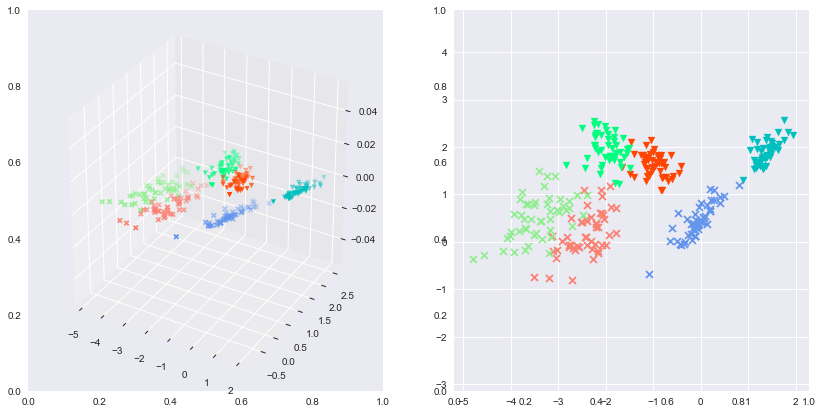

In [24]:
figH, axH = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
axH_00 = figH.add_subplot(121, projection='3d');
axH_00.scatter(X_reduced[Y==0,0],X_reduced[Y == 0,1],c = 'c', marker ='v')
axH_00.scatter(X_reduced[Y==1,0],X_reduced[Y == 1,1],c = 'orangered', marker ='v')
axH_00.scatter(X_reduced[Y==2,0],X_reduced[Y == 2,1],c = 'springgreen', marker ='v')
axH_00.scatter(X_reduced_prime[Y==0,0],X_reduced_prime[Y == 0,1],c = 'cornflowerblue', marker ='x')
axH_00.scatter(X_reduced_prime[Y==1,0],X_reduced_prime[Y == 1,1],c = 'salmon', marker ='x')
axH_00.scatter(X_reduced_prime[Y==2,0],X_reduced_prime[Y == 2,1],c = 'lightgreen', marker ='x')

axH_01 = figH.add_subplot(122);
axH_01.set_aspect(1,'datalim')
axH_01.scatter(X_reduced[Y==0,0],X_reduced[Y == 0,1],c = 'c', marker ='v')
axH_01.scatter(X_reduced[Y==1,0],X_reduced[Y == 1,1],c = 'orangered', marker ='v')
axH_01.scatter(X_reduced[Y==2,0],X_reduced[Y == 2,1],c = 'springgreen', marker ='v')
axH_01.scatter(X_reduced_prime[Y==0,0],X_reduced_prime[Y == 0,1],c = 'cornflowerblue', marker ='x')
axH_01.scatter(X_reduced_prime[Y==1,0],X_reduced_prime[Y == 1,1],c = 'salmon', marker ='x')
axH_01.scatter(X_reduced_prime[Y==2,0],X_reduced_prime[Y == 2,1],c = 'lightgreen', marker ='x')

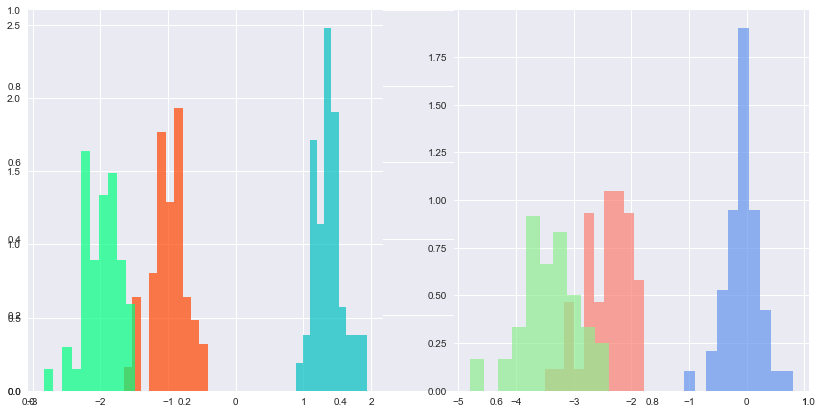

In [25]:
fig, ax = plt.subplots(figsize=(14,7))
ax = fig.add_subplot(121);
ax.hist(X_reduced[Y==0,0],bins=10, alpha=0.7, density=True, color = 'c');
ax.hist(X_reduced[Y==1,0],bins=10, alpha=0.7, density=True, color = 'orangered');
ax.hist(X_reduced[Y==2,0],bins=10, alpha=0.7, density=True, color = 'springgreen');
ax = fig.add_subplot(122);
ax.hist(X_reduced_prime[Y==0,0],bins=10, alpha=0.7, density=True, color = 'cornflowerblue');
ax.hist(X_reduced_prime[Y==1,0],bins=10, alpha=0.7, density=True, color = 'salmon');
ax.hist(X_reduced_prime[Y==2,0],bins=10, alpha=0.7, density=True, color = 'lightgreen');

## Linear regression with non-linear functions

In [26]:
np.random.seed(2)
N = 60
X = np.linspace(0,2*np.pi,N)
y = (np.sin(X) + np.random.normal(0,0.2,N)).reshape(N,1)
X = np.atleast_2d(X).T

### 5.1) Perfoming Linear Regression

In [27]:
def standardization(x):
    mean = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x = (x-mean)/sigma
    return x

def polyfn_design(x,n):
    x = np.reshape(x,[len(x),1])
    X_pow = np.ones([len(x),1])
    for i in range(1,n+1):
        u = (x**i)
        X_pow = np.hstack([X_pow,u])
        X_pow[:,1:] = standardization(X_pow[:,1:])
    return X_pow

def loss_function(x,y,w,l):
    return np.sum((y-x.dot(w))**2) + l*np.sum(w[1:]**2)

def gradient_descent(x, y, w, l, a, epochs):
    N = len(x)
    whist = [w]
    cost_hist = [loss_function(x,y,w,l)]
    for e in range(epochs):
        grad = -2*(x.T.dot((y-x.dot(w))) + l*np.sum(w[1:]))
        w = w - a*grad
        cost = loss_function(x,y,w,l)
        cost_hist.append(cost)
        whist.append(w)
    return w, np.asarray(whist), np.asarray(cost_hist), np.asarray(cost)

def pseudo(x,y,l,p):
    w = np.linalg.pinv(x.T.dot(x) + l*np.eye(p+1,p+1)).dot(x.T.dot(y))
    cost = loss_function(x,y,w,l)
    return w, cost

### 1) Using gradient descent

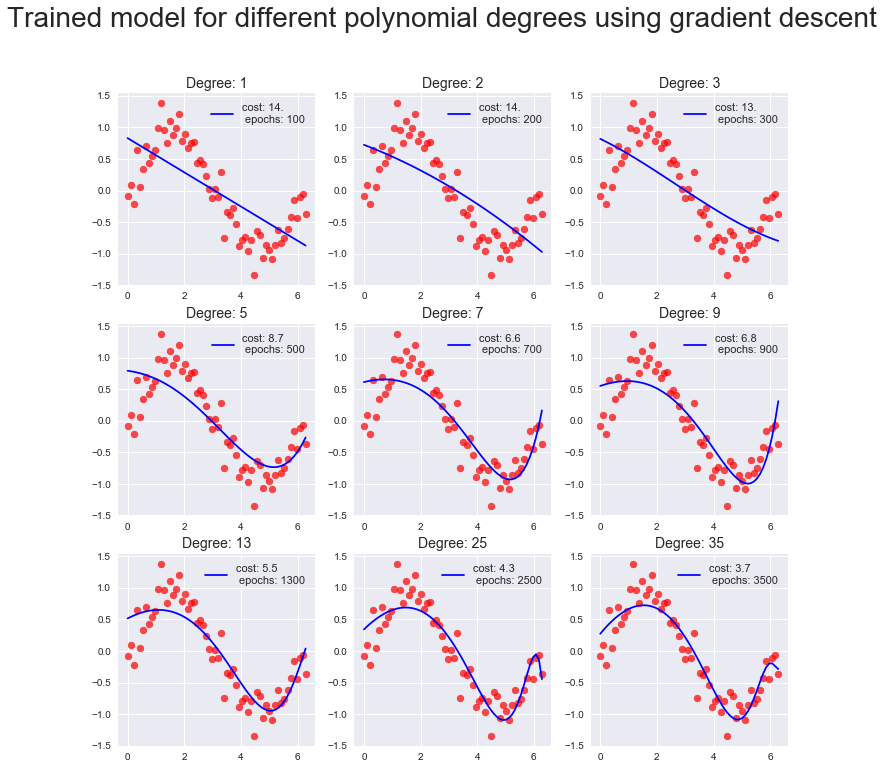

In [28]:
degree_mat = np.reshape([1,2,3,5,7,9,13,25,35],[3,3])   # polynomial degree matrix
alpha = 0.0005   # learning rate
epochs = 100  # No. iterations
lamda = 1.e-21       # regularization coef.


figI, axI = plt.subplots(nrows=3, ncols=3,figsize=(12,12))
for p in np.nditer(degree_mat):
    w = np.ones([p+1,1])
    Xmat = polyfn_design(X,p)
    i, j = np.where(degree_mat == p)
    epochs = 100*p
    w, whist,_,cost = gradient_descent(Xmat,y,w,lamda,alpha,epochs)
    axI[i[0],j[0]].scatter(X,y,alpha=0.7, color='r')
    axI[i[0],j[0]].plot(X,np.dot(Xmat,w), color ='b',label='cost: '+str(cost)[0:3]+'\n epochs: '+str(epochs))
    axI[i[0],j[0]].legend(fontsize=11)
    axI[i[0],j[0]].set_title('Degree: '+str(p),fontsize=14)
figI.suptitle('Trained model for different polynomial degrees using gradient descent',fontsize=28);

### 2) Solving through analytical solution

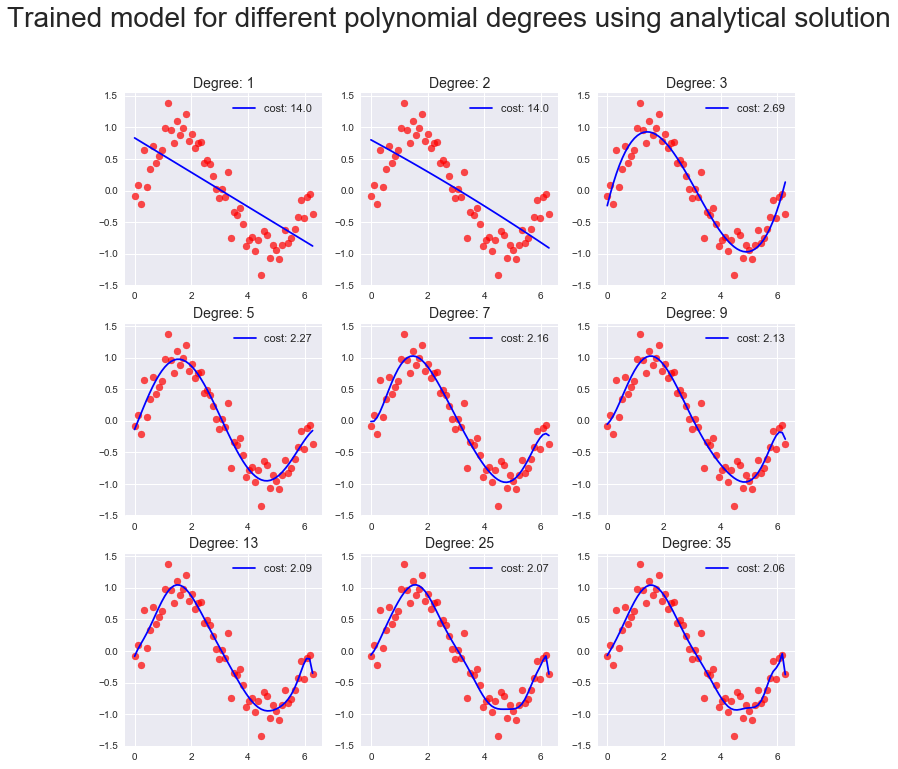

In [29]:
degree_mat = np.reshape([1,2,3,5,7,9,13,25,35],[3,3])   # polynomial degree matrix
lamda = 1.e-21       # regularization coef.

figJ, axJ = plt.subplots(nrows=3, ncols=3,figsize=(12,12));
for p in np.nditer(degree_mat):
    w = np.ones([p+1,1])
    Xmat = polyfn_design(X,p)
    i, j = np.where(degree_mat == p)
    w, cost = pseudo(Xmat,y,lamda,p)
    axJ[i[0],j[0]].scatter(X,y,alpha=0.7, color='r')
    axJ[i[0],j[0]].plot(X,np.dot(Xmat,w), color ='b',label='cost: '+str(cost)[0:4])
    axJ[i[0],j[0]].legend(fontsize=11)
    axJ[i[0],j[0]].set_title('Degree: '+str(p),fontsize=14)
figJ.suptitle('Trained model for different polynomial degrees using analytical solution',fontsize=28);

### 3) Performance of the analytical solution for various degrees and λ coeff.

training samples  36 testing samples  24


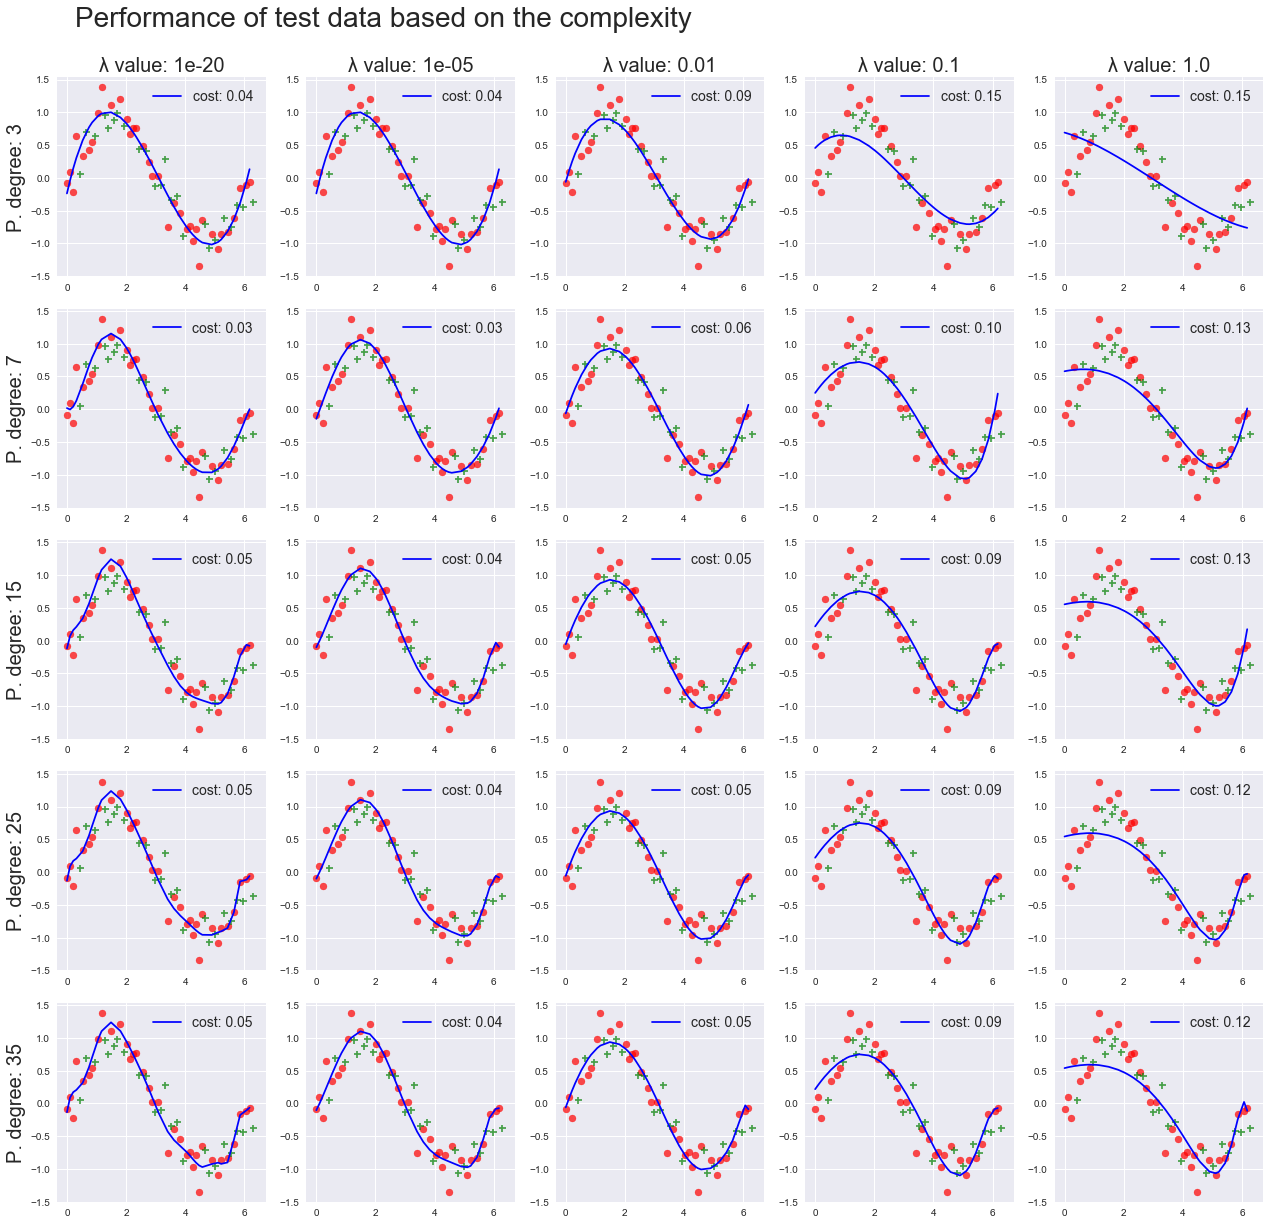

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=3)
X_train, y_train = zip(*sorted(zip(X_train, y_train))) # to plot it right

degree_mat = [3,7,15,25,35]                  # polynomial degrees matrix
lamda = [1.e-20,1.e-5,1.e-2,1.e-1,1.e0]       # regularization coef.

figL, axL = plt.subplots(nrows=5,ncols=5,figsize=(25,25));
figL.tight_layout(rect=[0.3, 0.3, 1, 0.95])
for i,p in enumerate(degree_mat):
    for j,l in enumerate(lamda):
        w = np.ones([p+1,1])  
        Xtrain_mat = polyfn_design(X_train,p)
        Xtest_mat = polyfn_design(X_test,p)
        w,_ = pseudo(Xtrain_mat,y_train,l,p)
        cost = loss_function(Xtest_mat,y_test,w,l)/len(y_test)
        axL[i,j].scatter(X_train,y_train,alpha=0.7, color='r')
        axL[i,j].scatter(X_test,y_test,alpha=0.7, marker='+', color='green')
        axL[i,j].plot(X_train,np.dot(Xtrain_mat,w), color ='b',label='cost: '+str(cost)[0:4])
        axL[i,j].legend(fontsize=14)
    axL[i,0].set_ylabel('P. degree: '+str(degree_mat[i]),fontsize=20)
    axL[0,i].set_title('λ value: '+str(lamda[i]),fontsize=20)
figL.suptitle('Performance of test data based on the complexity',fontsize=28);
print("training samples ",len(X_train), "testing samples ", len(X_test))

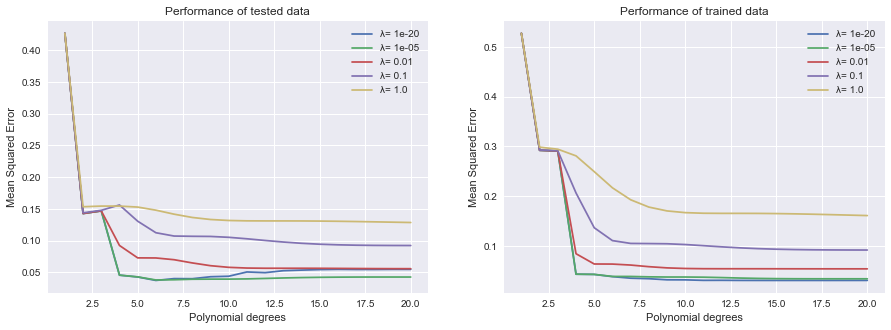

In [31]:
lamda = [1.e-20,1.e-5,1.e-2,1.e-1,1.e0]
d = 20 # max degrees

cost = np.empty([len(lamda), d]).tolist()
tr_cost = np.empty([len(lamda), d]).tolist()
figM, axM = plt.subplots(nrows=1,ncols=2,figsize=(15,5));
for i,l in enumerate(lamda):
    for p in range(d): #from 0 degree to 20
        w = np.ones([p+1,1])  
        Xtrain_mat = polyfn_design(X_train,p)
        Xtest_mat = polyfn_design(X_test,p)
        w,tr_cost[i][p] = pseudo(Xtrain_mat,y_train,l,p)
        cost[i][p] = loss_function(Xtest_mat,y_test,w,l)/len(y_test)
    tr_cost[i][:] = [x/len(y_train) for x in tr_cost[i][:]]
    axM[0].plot(np.linspace(1,d,d),cost[i][:],label='λ= '+str(l))
    axM[1].plot(np.linspace(1,d,d),tr_cost[i][:],label='λ= '+str(l))
axM[0].legend(); axM[1].legend()
axM[0].set_title('Performance of tested data'); axM[1].set_title('Performance of trained data')
axM[0].set_xlabel('Polynomial degrees'); axM[1].set_xlabel('Polynomial degrees')
axM[0].set_ylabel('Mean Squared Error'); axM[1].set_ylabel('Mean Squared Error');

In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10 , shuffle=False, random_state=None)
kf.get_n_splits(X,y)

degree_mat = [3,7,15,25,35]
lamda = [1.e-20,1.e-5,1.e-2,1.e-1,1.e0]
resid_error = np.empty([5,5])
for i,p in enumerate(degree_mat):
    for j,l in enumerate(lamda):
        cost=[]
        for tr_idx, ts_idx in kf.split(X):
            X_train, X_test = X[tr_idx], X[ts_idx]
            y_train, y_test = y[tr_idx], y[ts_idx]
            Xtrain_mat = polyfn_design(X_train,p)
            Xtest_mat = polyfn_design(X_test,p)
            w,_ = pseudo(Xtrain_mat,y_train,l,p)
            cost.append(loss_function(Xtest_mat,y_test,w,l)/len(y_test))
        resid_error[i,j] = np.mean(np.asarray(cost))
        
table = np.hstack([np.atleast_2d(degree_mat).T, resid_error])
header = np.hstack(['-----',lamda])
np.set_printoptions(precision=3)
print('Average error for 10-fold cross validation: ') #the first row is the regularization values
print(header)                                         #the first column is the polynomial degree
print(table)

Average error for 10-fold cross validation: 
['-----' '1e-20' '1e-05' '0.01' '0.1' '1.0']
[[ 3.     0.748  0.749  0.936  1.167  0.988]
 [ 7.     0.736  0.774  0.845  0.918  1.02 ]
 [15.     1.028  0.779  0.81   0.926  1.009]
 [25.     2.869  0.782  0.815  0.916  1.002]
 [35.     1.987  0.782  0.816  0.914  0.984]]
